In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
df.shape

(545, 13)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [32]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [33]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


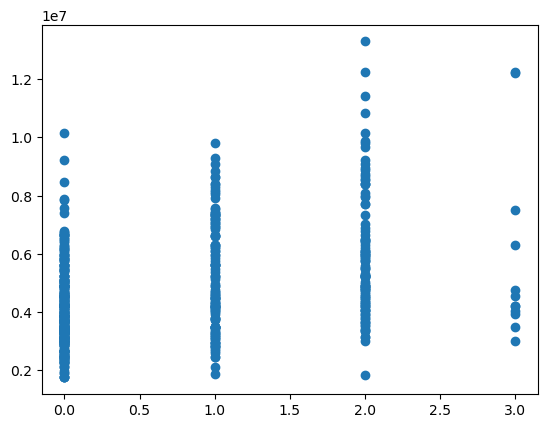

In [34]:
plt.scatter(df["parking"],df["price"])
plt.show()

<Axes: xlabel='area', ylabel='price'>

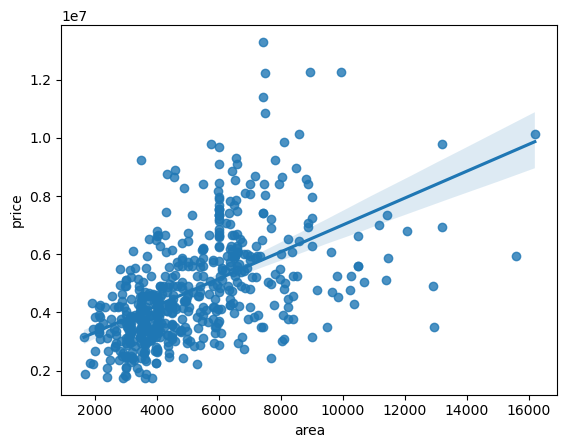

In [35]:
sns.regplot(x="area",y="price",data=df)

In [36]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [124]:
x=df.drop(["price","hotwaterheating","airconditioning"],axis=1)
y=df["price"]

In [125]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [126]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,no,0,2,1,0
1,8960,4,4,4,1,no,0,3,0,0
2,9960,3,2,2,1,no,1,2,1,1
3,7500,4,2,2,1,no,1,3,1,0
4,7420,4,1,2,1,yes,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,no,1,2,0,2
541,2400,3,1,1,0,no,0,0,0,1
542,3620,2,1,1,1,no,0,0,0,2
543,2910,3,1,1,0,no,0,0,0,0


In [127]:
le_main = LabelEncoder()
x["mainroad"]= le_main.fit_transform(x["mainroad"])

In [128]:
le_guest = LabelEncoder()
x["guestroom"]= le_guest.fit_transform(x["guestroom"])

In [129]:
le_base = LabelEncoder()
x["basement"]= le_base.fit_transform(x["basement"])

In [130]:
le_pre = LabelEncoder()
x["prefarea"]= le_pre.fit_transform(x["prefarea"])

In [131]:
le_fur = LabelEncoder()
x["furnishingstatus"]= le_fur.fit_transform(x["furnishingstatus"])

In [132]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,2,1,0
1,8960,4,4,4,1,0,0,3,0,0
2,9960,3,2,2,1,0,1,2,1,1
3,7500,4,2,2,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,2,0,2
541,2400,3,1,1,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0


In [133]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [145]:
scl = StandardScaler()
x_train = scl.fit_transform(x_train)
x_test = scl.transform(x_test)


In [193]:
model = KNeighborsClassifier(n_neighbors=1)

In [194]:
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [195]:
y_pred = model.predict(x_train)

In [196]:
acc = accuracy_score(y_train,y_pred)
acc

0.9862385321100917

In [197]:
sample = [[1000000,3,2,3,0,1,0,1,0,1]]
sample_scaled=scl.transform(sample)

model.predict(sample_scaled)

array([10150000], dtype=int64)

In [198]:
sample2 = [[2,2,1,1,0,0,0,1,0,0]]
sample_scaled2=scl.transform(sample2)

model.predict(sample_scaled2)

array([5600000], dtype=int64)

In [175]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,2,1,0
1,8960,4,4,4,1,0,0,3,0,0
2,9960,3,2,2,1,0,1,2,1,1
3,7500,4,2,2,1,0,1,3,1,0
4,7420,4,1,2,1,1,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,2,0,2
541,2400,3,1,1,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,2
543,2910,3,1,1,0,0,0,0,0,0


In [152]:
score = []

for i in range(1,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_train)
    score.append(accuracy_score(y_train,y_pred))

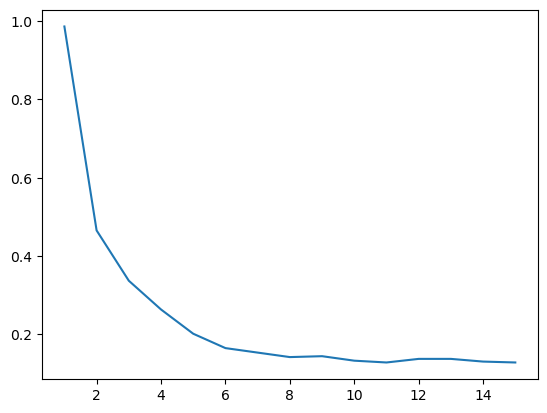

In [153]:
plt.plot(range(1,16),score)
plt.show()